

# Abstract
Perlin noise is a popular generation algorithm invented by Ken Perlin (currently a NYU professor) in 1983. The algorithm's purpose is to create visual noise, which doesn't look rough (i.e. computer-generated), but rather smooth.

The algorithm is hard to be comprehended by beginners. That's why in this article we would do our best to present the algorithm in the easiest possible way.

#### Keywords
noise, perlin noise

# Introduction

Perlin noise is a type of gradient noise, which looks smoother than simply randomly generated one.


![Example of smooth perlin noise 3D](perlin/white_noise_vs_perlin_noise_3D.png)


<br>


## Definition of Terms

But before we delve into the Perlin noise details, let's first clarify few terms.

### Gradient
A gradient is a visual effect where one color **smoothly** transitions into another color or a series of colors.

![Example of visual gradient](perlin/gradient_example.png)

### Noise
In this article when "noise" is mentioned, what is meant is actually **random noise**. Random noise refers to any kind of noise that is unpredictable and has no pattern. Random noise is basically a series of random numbers. In Python we can use `random.randint()` for generating random numbers.

In [38]:
import random

noise = [random.randint(-5, 5) for _ in range(50)]
print(noise)

[1, 3, -5, 2, -4, -4, -1, 5, 5, -2, 4, 5, 1, -2, -3, -4, 5, -3, -4, 2, 5, 5, 1, 0, 3, -3, -1, 4, 5, 4, 1, 5, 3, 1, -2, 0, -4, 0, 0, 0, 3, -4, -5, -2, 0, -2, -5, 5, -1, 3]


We have generated a flat series of numbers (noise). Now let's visualize the effect of this noise as a graphic.

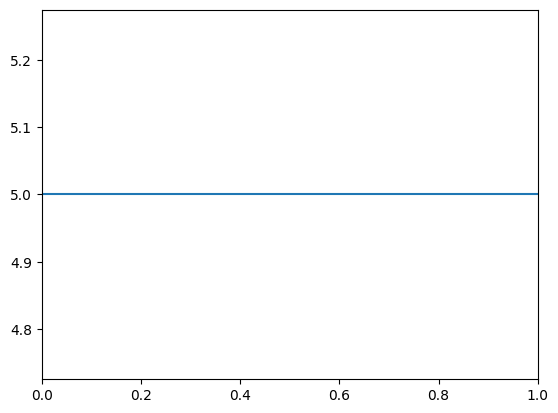

In [39]:
import matplotlib.pyplot as plt

# Firstly, let's draw a flat line (no noise).
signal = 5
plt.axhline(y=signal)
plt.show()

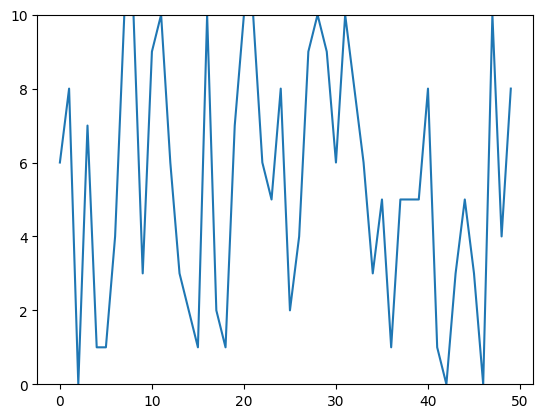

In [40]:
# Apply the noise to the signal.
signal_with_noise = [signal + noise[i] for i in range(len(noise))]

# And re-draw the signal (with the applied noise).
plt.ylim(0, 10) # Set the y-axis limits to 0-10
plt.plot(signal_with_noise)
plt.show()

We can see how sharp the figure currently is. Let's do it again! This time instead of randomly generated noise we will plot perlin-generated noise. For that sake an external Python library 
```pip install perlin-noise``` 
would be required.

[0.0, 0.0, -0.2, -0.6, -1.2, -1.6, -1.8, -1.7, -1.3, -0.7, 0.0, 0.7, 1.1, 1.2, 1.0, 0.5, -0.0, -0.5, -0.6, -0.4, 0.0, 0.5, 0.7, 0.8, 0.5, 0.1, -0.3, -0.6, -0.6, -0.4, 0.0, 0.5, 1.2, 2.1, 2.8, 3.2, 3.1, 2.6, 1.8, 0.9, 0.0, -0.8, -1.7, -2.5, -3.0, -3.1, -2.7, -1.9, -1.1, -0.5]


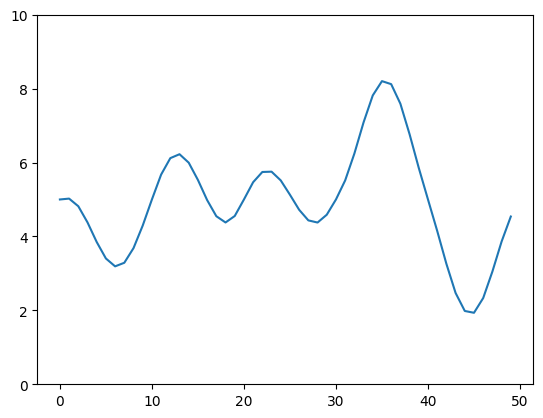

In [41]:
from perlin_noise import PerlinNoise

perlin_noise_generator = PerlinNoise(octaves=5)
perlin_noise = [perlin_noise_generator([k/50])*10 for k in range(50)]
print([round(pn, 1) for pn in perlin_noise])

# Apply the noise to the signal.
signal_with_perlin_noise = [signal + perlin_noise[i] for i in range(50)]

# And re-draw the signal (with the applied Perlin noise).
plt.ylim(0, 10) # Set the y-axis limits to 0-10 (in order to have the same scale as the previous plot)
plt.plot(signal_with_perlin_noise)
plt.show()

Simple observation shows the Perlin algorithm outputs much smoother noise. Latter means the generated numbers are no longer completely random. Therefore, Perlin Noise alogrithm is "pseudo-random" algorithm (looks random, but it's not entirely random, since every value in the sequence depends on the one before).

#### Types of Noise

There are several different categories of noise.

##### White Noise
This method consists of the creation of a lattice of points which are assigned **random** values. 100% random values.

##### Value Noise
This method is an upgraded version of the 'White Noise' method. Value Noise consists of the creation of a lattice of points which are assigned **random** values (as in 'White Noise'). However, the noise function then returns the interpolated number *based on the values of the surrounding lattice points*.

**HOW**: Basically, we paint the points in the grid with **random** values (white noise) and fill the surrounding pixels by linear interpolation. This will look ugly because (among other things) some of the random grid points will happen to have similar values, and then there will be large spots with nearly uniform color (low frequency).

##### Gradient Noise
Gradient noise is one of the most commonly used methods for generation of texture primitives in computer graphics.
It is conceptually different from, and often confused with, "value noise". Gradient Noise method consists of a creation of a lattice of  **random** (pseudorandom) **gradients**, dot products of which are then interpolated to obtain values in between the lattices. Examples of gradient noise algorithms are "Perlin noise" and "Simplex noise".

**HOW**: Basically, we compute a random (uniform, white noise) gradient in each grid point, and compute the values by interpolating the dot products of the gradient with the distances. Consider again what happens in the neighborhoood of a grid point, specifically over a small circumference, disregarding the effect of other distant grid points. It's seen that the computed image value (as a dot product) in this small neighborhood will visit *smoothly*, but *fully* the white-black range. Then, we can expect that the image values will never have uniform spots, i.e., we won't practically have frequencies below that of the grid spacing.

##### Cellular Noise
In 1996, sixteen years after Perlin's original Noise and five years before his Simplex Noise, Steven Worley invented the Cellular Noise.

The cellular noise is designed to distribute the feature points in a grid’s cells, each cell containing a random number of points. This number, as well as the positions of the feature points in the cell are computed on-the fly based on the location of the cell. Cellular Noise is based on distance fields, the distance to the closest one of a set of feature points.

When computing Worley noise, each seed is located within its own grid square.


![Categories of noise](perlin/categories_of_noise.png)


#### Coherent Noise
`A type of smooth pseudorandom noise.` 

Coherent noise is a function that is random looking but locally sensitive. Coherent-noise function has three important properties:

* Passing in the same input value will always return the same output value.
* A small change in the input value will produce a small change in the output value.
* A large change in the input value will produce a random change in the output value.

### Visual Smoothness

In computer graphics sharp patterns look pixelated (i.e. computer-generated), while the smooth textures usually look more natural and that's why latter are preferred.

![Example of smooth noise 1D](perlin/sharp_vs_smooth_1D.png)
![Example of smooth perlin noise 2D](perlin/perlin_noise_example_2d.png)

**Figure:** white noise (left) vs gradient noise (right). White noise is not suitable for texture generation. Right noise is better because it has a smooth appearance, which is better for faking natural patterns.

### Vector
In the context of this article we will use the geometric definition of a vector:
 - *An object that has both a direction and a magnitude.*

 Geometrically, we can picture a vector as a directed line segment, whose length is the magnitude of the vector and with an arrow indicating the direction. 

### Dot Product
There are multiple operations that could be applied over vectors (*addition, subtraction, multiplication, modulus*). However, in current article we will be extensively using "Dot Product" operation.

### Interpolation
Interpolation is to estimate the value of a point between two given points in a data set. For example, if a child's height was measured at age `5` and age `6`, interpolation could be used to estimate the child's height at age `5.5`, at age `5.2`, etc.

### Linear Interpolation
Linear interpolation is a type of interpolation where we calculate all the points between the two ends (e.g. between `5` and `6`) in a linear manner.
Since `5.5` is midway between `5` and `6`, it is reasonable to take `f(5.5)` midway between `f(5) = 100cm` and `f(6) = 110cm`, which yields `f(5.5) = 105cm`. Following the same logic `f(5.1) = 101cm`. <br>
Linear interpolation is quick and easy, but it is not very precise. 

# Methods

## Perlin Noise
Perlin noise is a popular procedural generation algorithm invented by Ken Perlin. It can be used to generate things like textures and terrain procedurally, meaning without them being manually made by an artist or designer. The algorithm can work for 1 or more dimensions. In this article, we will use 2 dimensions, because it’s easier to be visualized than 3 dimensions. 

## Implementation

Firstly, let's plot a simple 2-D picture with 100x100 resolution. Which basically means we need to draw a grid of points (100 x 100). The value of each cell in the grid represents a specific color code. Let's draw only zeroes at first (black colour).

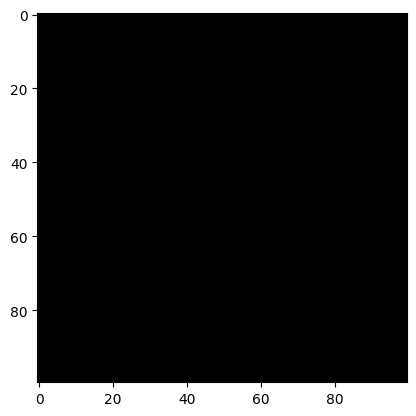

In [42]:
from matplotlib import pyplot as plt
import numpy as np

width, height = 100, 100
pixels = np.zeros((width, height))

for x in range(width):
    for y in range(height):
        pixels[x, y] = 0

plt.imshow(pixels, cmap="binary_r")
plt.show()

Now let's convert the one-colour picture to a smooth gradient.

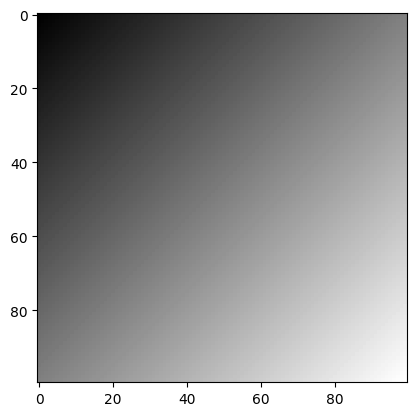

In [43]:
pixels = np.zeros((width, height))

for x in range(width):
    for y in range(height):
        pixels[x, y] = (x + y)/(width + height) # Normalize all the values to be in the range [0.0, 1.0]

plt.imshow(pixels, cmap="binary_r")
plt.show()

Now let's randomize the values in the grid.

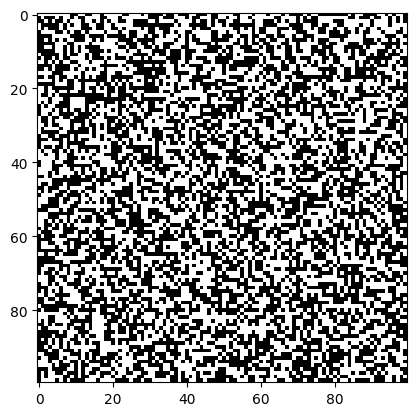

In [44]:
pixels = np.zeros((width, height))

for x in range(width):
    for y in range(height):
        pixels[x, y] = np.random.randint(0,2) # 0 or 1

plt.imshow(pixels, cmap="binary_r")
plt.show()

We have 100% random white noise now. But we want Perlin noise instead. So, let's start implementing it.

The Perlin noise algorithm takes as input 2 parameters: `x` and `y`(a point in the texture grid). The output is a value in a certain range (for Perlin noise, that range is `[-1.0, 1.0]`). So for texture generation, we would loop through every pixel in the texture, calling the Perlin noise function for each one and decide, based on the return value, what color that pixel would be.

In [45]:
def noise(self, x: float, y: float) -> float:
    """
    Generate the perlin noise at the point (x, y).

    Args:
        x: float -> The x coordinate of the point in the grid. Value is in [0.0, 1.0]
        y: float -> The y coordinate of the point in the grid. Value is in [0.0, 1.0]

    Returns:
        float -> The value of the perlin noise at the point (x, y)
    """
    pass

The input is `(x, y)` - the coordinates of a point in the grid. Every such point lies within a square of this grid.

1. Once we have the coordinates of the four corners of that square we build four internal vectors - from the corners of the square to the internal point `(x, y)`.
2. For each of these four *corner vectors* we pick another *gradient vector* - randomly picked among next four pre-defined gradient vectors: `(1, 1), (-1, 1), (1, -1), (-1, -1)`.
* In the `Improved Perlin noise` algorithm, instead of selecting any random vector, one of four pre-defined vectors are used instead which leads to better (smoother) results. 

![Perlin Vectors (Corner and Gradient)](perlin/perlin_vectors.png)

3. Once we have all the four *corner vectors* ($\vec{tr}$, $\vec{tl}$, $\vec{br}$, $\vec{bl}$) and their corresponding *gradient vectors* ($\vec{trgv}$, $\vec{tlgv}$, $\vec{brgv}$, $\vec{blgv}$), we simply calculate the **dot product** of each vector pair.

In [46]:
import math

class Vector():
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y

    def dot(self, other: "Vector"):
        return self.x * other.x + self.y * other.y

def noise(self, x: float, y: float) -> float:
        # Get the fractional part of the coordinates.
        xf = x - math.floor(x)
        yf = y - math.floor(y)

        # STEP 1: Determine the 4 vectors - from the corners of the square that contains the point (x, y) to the point itself (x, y)
        top_right_vector = Vector(xf - 1.0, yf - 1.0)
        top_left_vector = Vector(xf, yf - 1.0)
        bottom_right_vector = Vector(xf - 1.0, yf)
        bottom_left_vector = Vector(xf, yf)

        # STEP 2: For each corner assign a random value [0-255] from the permutation array.
        # Based on this random value, we will get the corresponding constant vector.
        random_value_top_right = self.__get_random_value(x + 1, y + 1)
        random_value_top_left = self.__get_random_value(x, y + 1)
        random_value_bottom_right = self.__get_random_value(x + 1, y)
        random_value_bottom_left = self.__get_random_value(x, y)

        # STEP 3: Get the dot product of each of the 4 corner vectors and its corresponding gradient vector.
        # The gradient vector is simply a unit vector (e.g. (1, 1) or (-1, -1)) in one of 4 directions.            
        dot_top_right = top_right_vector.dot(self.__get_gradient_vector(random_value_top_right))
        dot_top_left = top_left_vector.dot(self.__get_gradient_vector(random_value_top_left))
        dot_bottom_right = bottom_right_vector.dot(self.__get_gradient_vector(random_value_bottom_right))
        dot_bottom_left = bottom_left_vector.dot(self.__get_gradient_vector(random_value_bottom_left))

Next, fade the fraction values of `x` and `y` by using special function, designed by prof. Perlin:
$$ 6t^5 - 15t^4 + 10t^3 $$

The initial prof. Perlin's interpolation function was:
$$ 3t^2 - 2t^2  $$

but it had worse continuity properties. The new function doesn’t affect the range of values of Perlin noise, but it does affect the value and location of the maximum in the gradient magnitude.

In [47]:
def __fade(self, t: float) -> float:
        """ 
        Fade function as defined by Ken Perlin (6t^5 - 15t^4 + 10t^3). This eases coordinate values, 
        so that they will ease towards integral values. This ends up smoothing the final output.        
        """
        return t * t * t * (t * (t * 6 - 15) + 10)

Finally, smoothly interpolate between those 4 random values to get a final value.

In [48]:
def __lerp(self, t: float, a1: float, a2: float) -> float:
    return a1 + t * (a2 - a1)

# __lerp(x_faded, __lerp(y_faded, dot_bottom_left, dot_top_left), __lerp(y_faded, dot_bottom_right, dot_top_right))

And here is the result:

![Perlin Single Octave](perlin/perlin_1_octave.png)

The texture is smooth, but there are not many gradients in it. That's why we would not use Perlin noise alone. So for every final value we want (for example a single pixel in a height map texture), we would call the noise function multiple times (octaves). This is called *"Fractional Brownian motion"* (fBm). The fBm is just another type of Brownian motion (movement of particles). For the simplicity of this article let's assume that fBm is the accummulated noise, generated from multiple steps (layers) of Perlin Noise, each with different frequency.


In [49]:
def fractal_brownian_motion(self, x: float, y: float, octaves: int) -> float:
    accumulated_noise = 0
    freq = 1;
    for i in range(octaves):
        accumulated_noise += self.noise(x * freq, y * freq)
        freq *= 2;
    return accumulated_noise

And here comes the full implementation of Perlin Noise algorithm with applied Fractional Brownian motion on top of it.



*NB: Current implementation is not performant in terms of speed and memory consumption (e.g. thousands of useless vector objects are being created), but it's quite simple and easy to be understood. In terms of completeness, we haven't implemented `amplitude` on purpose, in order to keep the implementation as simple as possible (yet working).*

In [50]:
import math
from matplotlib import pyplot as plt
import numpy as np

class Vector():
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y

    def __str__(self):
        return f"Vector({self.x}, {self.y})"

    def dot(self, other: "Vector"):
        return self.x * other.x + self.y * other.y

class PerlinNoise():
    def __init__(self, width: int, height: int, octaves: int = 1):
        self.width = width
        self.height = height
        self.octaves = octaves
        self.permutations = self.__generate_random_numbers()

    def noise_2d(self) -> float:
        pixels = np.zeros((self.width, self.height))
        for x in range(self.width):
            for y in range(self.height):
                # Each of the input parameters (x, y) is in [0.0, 1.0], the output is in [-1.0, 1.0]
                noise: float = self.fractal_brownian_motion(x/self.width, y/self.height, self.octaves)
                # Update the grid
                pixels[x, y] = noise
        return pixels

    def fractal_brownian_motion(self, x: float, y: float, octaves: int) -> float:
        accumulated_noise = 0
        freq = 1;
        for i in range(octaves):
            accumulated_noise += self.noise(x * freq, y * freq)
            freq *= 2;
        return accumulated_noise

    def noise(self, x: float, y: float) -> float:
        """
        Generate the perlin noise at the point (x, y).

        Args:
            x: float -> The x coordinate of the point in the grid. Value is in [0.0, 1.0]
            y: float -> The y coordinate of the point in the grid. Value is in [0.0, 1.0]

        Returns:
            float -> The value of the perlin noise at the point (x, y)
        """
        # Get the fractional part of the coordinates.
        xf = x - math.floor(x)
        yf = y - math.floor(y)

        # STEP 1: Determine the 4 vectors - from the corners of the square that contains the point (x, y) to the point itself (x, y)
        top_right_vector = Vector(xf - 1.0, yf - 1.0)
        top_left_vector = Vector(xf, yf - 1.0)
        bottom_right_vector = Vector(xf - 1.0, yf)
        bottom_left_vector = Vector(xf, yf)

        # STEP 2: For each corner assign a random value [0-255] from the permutation array.
        # Based on this random value, we will get the corresponding gradient vector.
        random_value_top_right = self.__get_random_value(x + 1, y + 1)
        random_value_top_left = self.__get_random_value(x, y + 1)
        random_value_bottom_right = self.__get_random_value(x + 1, y)
        random_value_bottom_left = self.__get_random_value(x, y)

        # STEP 3: Get the dot product of each of the 4 corner vectors and its corresponding gradient vector.
        # The gradient vector is simply a unit vector (e.g. (1, 1) or (-1, -1)) in one of 4 directions.            
        dot_top_right = top_right_vector.dot(self.__get_gradient_vector(random_value_top_right))
        dot_top_left = top_left_vector.dot(self.__get_gradient_vector(random_value_top_left))
        dot_bottom_right = bottom_right_vector.dot(self.__get_gradient_vector(random_value_bottom_right))
        dot_bottom_left = bottom_left_vector.dot(self.__get_gradient_vector(random_value_bottom_left))

        # STEP 4: Fade the values
        x_faded = self.__fade(xf)
        y_faded = self.__fade(yf)

        # STEP 5: Interpolate the values
        return self.__lerp(x_faded,
                    self.__lerp(y_faded, dot_bottom_left, dot_top_left),
                    self.__lerp(y_faded, dot_bottom_right, dot_top_right))
    
    def __get_random_value(self, x: int, y: int) -> int:
        """
        Get the value from the randomized permutation array for the point (x, y).
        """
        X = math.floor(x) % 256
        Y = math.floor(y) % 256
        return self.permutations[X][Y]

    def __generate_random_numbers(self) -> list[list[int]]:
        """
        Generates a randomly shuffled grid of all numbers from 0 to 255.

        Returns:
            list[list[int]] -> A 100x100 grid with values from the shuffled permutation array.
        """
       # Generate a list of numbers from 0 to 255
        p = np.arange(256, dtype=int)
        # Shuffle the list
        np.random.shuffle(p)
        # Spread the values in a grid of 100x100 (this will simplify the process of getting the value for the point (x, y))
        return [[p[(i*j)%256] for j in range(100)] for i in range(100)]
    
    def __get_gradient_vector(self, v: int) -> Vector:
        """
        Get the gradient vector for the value v. The gradient vector is determined by the value v. 
        The value v is the value from the permutation table [0-255].

        Args:
            v: int -> The value from the permutation table [0-255]

        Returns:
            Vector -> The gradient vector for the value v. The vector is a unit vector in one of 4 directions.
        """
        v = v % 4 # We have 4 directions. So, normalize the value v to the range [0-3].
        if v == 0: 
            return Vector(1.0, 1.0) 
        elif v == 1: 
            return Vector(-1.0, 1.0) 
        elif v == 2: 
            return Vector(-1.0, -1.0)
        else: 
            return Vector(1.0, -1.0)
    
    def __fade(self, t: float) -> float:
        """ 
        Fade function as defined by Ken Perlin (6t^5 - 15t^4 + 10t^3). This eases coordinate values, 
        so that they will ease towards integral values. This ends up smoothing the final output.
        `t` is in the range [0.0, 1.0]
        """
        return t * t * t * (t * (t * 6 - 15) + 10)
        # return t * t * (3 - 2 * t)
    
    def __lerp(self, t: float, a1: float, a2: float) -> float:
        return a1 + t * (a2 - a1)

## Demo
Now. let's generate few plots by using different values for octaves (brownian motion iterations).

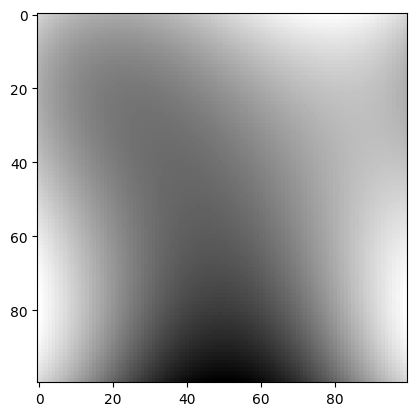

In [51]:
perlin = PerlinNoise(100, 100, 1)
plt.imshow(perlin.noise_2d(), cmap="grey")
plt.show()

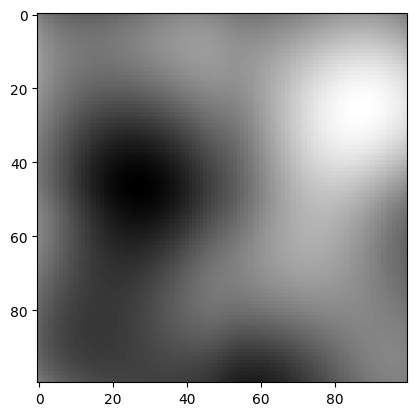

In [52]:
perlin = PerlinNoise(100, 100, 2)
plt.imshow(perlin.noise_2d(), cmap="grey")
plt.show()

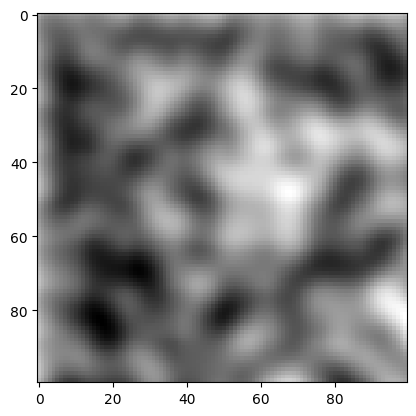

In [53]:
perlin = PerlinNoise(100, 100, 4)
plt.imshow(perlin.noise_2d(), cmap="grey")
plt.show()

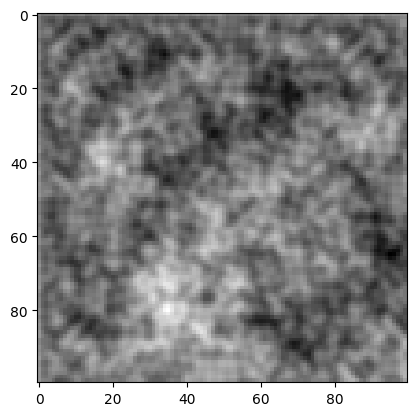

In [54]:
perlin = PerlinNoise(100, 100, 6)
plt.imshow(perlin.noise_2d(), cmap="grey")
plt.show()

# Results

Perlin Noise algorithm is hard to be comprehended by beginners. Being implemented is even harder. In this article, we introduced the reader to all the basic concepts needed for understanding the algorithm (noise, vectors, gradient, interpolation, etc.). Then we explained the Perlin Noise algorithm itself in an easy-to-consume manner. And finally, a basic python implementation of the algorithm was presented.

# Further direction

If the reader has successfully understood all the material, then she can research further the `frequency` and `amplitude` parameters of Perlin Noise and how they affect the generated texture.

For example, if we are generating a terrain, we would want many octaves. The first one will produce the rough shape of the mountains, so we would want a high amplitude (e.g. 1.0) and low frequency (e.g. 1.0). But just this octave would result in really smooth terrain with no details. For those small details, we would want more octaves, but with higher frequencies (so in the same range for our inputs (x, y), we would have a lot more ups and downs of the Perlin noise value), and lower amplitudes (we want small details, because if we would keep the same amplitude as the first octave (1.0, in the example code), there would be a lot of ups and downs really close together and really high, and this would result in a really rough moutains (imagine 100 meters 80 degrees drops and slopes every few meters we walk)).


`Frequency`, `amplitude` and the number of `octaves` are the most common parameters we can play with to produce different values.

# References
* [Perlin Noise: A Procedural Generation Algorithm](https://rtouti.github.io/graphics/perlin-noise-algorithm)
* [Understanding Perlin Noise](https://adrianb.io/2014/08/09/perlinnoise.html)
* [Why is gradient noise better quality than value noise](https://math.stackexchange.com/questions/184121/why-is-gradient-noise-better-quality-than-value-noise)
* [Value Noise and Procedural Patterns](https://www.scratchapixel.com/lessons/procedural-generation-virtual-worlds/procedural-patterns-noise-part-1/creating-simple-1D-noise.html)
* [Cellular Noise](https://thebookofshaders.com/12/)
* **[Code]** [perlin-noise](https://pypi.org/project/perlin-noise/)
* **[Wiki]** [Gradient Noise](https://en.wikipedia.org/wiki/Gradient_noise)
* **[Wiki]** [Value Noise](https://en.wikipedia.org/wiki/Value_noise)
* **[Wiki]** [Worley Noise](https://en.wikipedia.org/wiki/Worley_noise)
* **[Video]** [How to turn few numbers into worlds (Fractal Perlin Noise))](https://www.youtube.com/watch?v=ZsEnnB2wrbI)
* **[Video]** [What is a vector?](https://www.youtube.com/watch?v=-AzQaL7nx4Y)
* **[Video]** [Vector operations](https://www.youtube.com/watch?v=KlNKKnc1OMQ)
* **[Video]** [Vector Modulus](https://www.youtube.com/watch?v=TtlH2kwTm3c)
* **[Video]** [Vector Dot Product](https://www.youtube.com/watch?v=ith40hDQD5o)
* **[Video]** [Interpolation in Statistics](https://study.com/academy/lesson/interpolation-in-statistics-definition-formula-example.html)
* **[Video]** [Interpolation in 5 minutes](https://www.youtube.com/watch?v=Xj129kA3Ci0)
* **[Paper]** [Implementation of Fast and Adaptive Procedural Cellular Noise](https://jcgt.org/published/0008/01/02/paper.pdf)
* [The range of Perlin noise](https://digitalfreepen.com/2017/06/20/range-perlin-noise.html)